<a href="https://colab.research.google.com/github/gongboogi/Python-Practice/blob/main/%EA%B8%B0%EC%88%A0%ED%86%B5%EA%B3%84%EC%99%80_%EB%8B%A8%EC%88%9C%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기술통계와 단순회귀분석

In [1]:
# 라이브러리 임포트
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
% matplotlib inline

# 소수점 세 번째 자리 숫자까지 표시
%precision 3

'%.3f'

## 인터넷 등에 올라와있는 데이터를 읽어들이기

미리 다운 받은 데이터를 불러올 수도 있지만 파이썬은 직접 데이터를 읽어들여 저장할 수 있다. 웹에서 ZIP 파일 형식으로 공개된 데이터를 다운로드해 이용해보겠다.

**현재 디렉터리 확인**

In [2]:
pwd

'/content'

**현재 디렉터리 생성과 이동**

다운로드될 디렉러리를 생성한다.

In [3]:
mkdir python-practice

In [4]:
cd ./python-practice

/content/python-practice


**샘플 데이터 다운로드**

디렉터리에 샘플 데이터를 다운로드한다. 캘리포니아 대학 어바인 캠퍼스가 제공하는 샘플데이터를 이용.

ZIP 파일을 읽어 들이거나 웹에서 직접 다운로드하려면 다음과 같이 requests, zipfile, io라는 세 개의 라이브러리를 사용한다.

In [5]:
# 웹에서 데이터를 받거나 zip 파일을 다루기 위한 라이브러리
import requests, zipfile
from io import StringIO
import io

**ZIP 파일 다운, 압축풀기**

In [6]:
# 데이터가 있는 url 지정
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

# 데이터를 url에서 받기
r = requests.get(url, stream = True)

# zipfile을 읽어들여 압축 풀기

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [7]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


## 데이터 읽기와 확인

데이터를 DataFrame으로 읽어들이기

In [8]:
student_data_math = pd.read_csv('student-mat.csv')

데이터 확인

head 명령어를 실행하면 데이터의 첫 행부터 시작해 일부 데이터를 샘플로 출력한다.

In [9]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


쉼표로 구분된 데이터 읽어 들이기

위의 상태로는 데이터를 다루기 힘들다, CSV 파일은 쉼표로 데이터를 구분하는 것이 일반적이지만 다운로드한 데이터가 세미콜론(;)으로 구분되어 있기 때문에 read_csv의 파라미터로 sep='구문하는문자' 에 세미콜론을 입력하여 읽어 들인다.

In [10]:
# 데이터 읽어 들이기
# 구분하는 기호로 ;가 붙어 있다는 점에 주의
student_data_math = pd.read_csv('student-mat.csv', sep = ';')

In [11]:
# 데이터 확인
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


read_csv는 sep 이외에도 몇 가지 파라미터가 있다. 구분 문자 말고도 데이터명(웹 주소 포함), 헤더 포함 여부를 지정할 수 있다.

In [12]:
?pd.read_csv

## 데이터 특성 파악

**데이터 개수와 형을 확인: info()**

In [13]:
# 모든 칼럼 정보 등 확인
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

info 함수를 사용하면 모든 변수에 대해 null이 아닌 데이터의 개수나 변수의 형을 알 수 있다.

데이터는 총 395개고, non-null은 null이 아닌 데이터를 의미한다. 모든 변수가 395 non-null이므로 null 데이터가 없다.

## 정량 데이터와 정성 데이터

데이터를 살펴보면 수치형 데이터도 있고, 성별과 같은 속성 데이터도 있다.



*   정량 데이터: 사칙연산이 가능한 연속적인 숫자로 표현할 수 있는 데이터. 비율이 의미를 가진다. 예) 사람 수 또는 금액 등
*   정성 데이터: 사칙 연산이 불가능한 데이터, 상태를 표현하기 위해 이용된다. 예) 순위 또는 범주 등의 데이터



In [14]:
student_data_math.sex.head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

-> 성별은 수치화 되어있지 않고 비교도 불가능한 정성데이터다.

In [15]:
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

-> 정량 데이터

**변수별 평균값 구하기**

판다스를 이용해 성별을 기준으로  각 연령별 평균값을 계산해본다.

In [16]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

In [17]:
student_data_math.groupby('sex')['Dalc'].mean()

sex
F    1.254808
M    1.732620
Name: Dalc, dtype: float64

In [18]:
student_data_math.groupby('sex')['G3'].mean()

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

## 기술통계

**히스토그램**


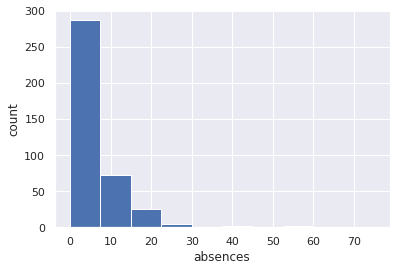

In [19]:
# histogram, 변수 데이터 지정
plt.hist(student_data_math['absences'])

# x축과 y축의 레이블 
plt.xlabel('absences')
plt.ylabel('count')

plt.grid(True)

-> 0에서 10 사이에 데이터가 집중되어있고 70 잇아의 숫자도 보이는 '롱테일 분포'라는 것을 알 수 있다. (분포 그래프의 밑단이 완만하게 감소하는 형태)

## 평균, 중앙값, 최빈값

히스토그램은 데이터의 전체적인 모습을 파악하는 데 부족함이 없지만 어떤 때 편향되는지에 대한 정보는 파악하기 어려워 객관성이 조금 부족하다.

In [20]:
# 평균값
print('평균값: ', student_data_math['absences'].mean())

# 중앙값
print('중앙값: ', student_data_math['absences'].median())

# 최빈값
print('최빈값: ', student_data_math['absences'].mode())

평균값:  5.708860759493671
중앙값:  4.0
최빈값:  0    0
dtype: int64


## 분산과 표준편차

데이터가 흩어져 있는지 모여 있는지(평균값 주변에 몰려 있는지) 분산으로 확인할 수 있다. 값이 작을수록 데이터의 흩어진 정도가 작다는 의미다.

In [21]:
# 분산
student_data_math['absences'].var(ddof=0)

63.887

In [22]:
# 표준편차
student_data_math['absences'].std()

8.003

In [23]:
np.sqrt(student_data_math['absences'].var(ddof=0)) #제곱근은 np.sqrt로도 계산 가능

7.993

## 요약 통계량과 백분위수

판다스로 읽어들인 DataFrame을 describe 메서드로 모든 통계량을 한번에 확인할 수 있다.

describe 메서드: 데이터의 수, 평균값, 표준편차, 최솟값, 25, 50, 75% 백분위수값, 최댓값을 계산해준다.

In [24]:
# 요약 통게량
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

**사분위범위 구하기**

describe 메서드 실행 결과는 Series 객체 형태다.

각 원소 값은 describe()[인덱스 번호]로 추출 가능하다. 

예를 들어, mean 값은 describe()[1], 표준편차는 describe()[2]

In [28]:
# 사분위범위 (75% 백분위수 값 - 25% 백분위수 값)
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

8.000

**모든 열을 대상으로 요약 통계량 구하기**

describe 메서드로 열이나 원소를 지정하지 않고 실행하면 모든 정량 데이터의 요약 통계량을 구할 수 있다. 열을 교차해서 계산도 가능하다.

In [30]:
# 한꺼번에 요약 통계량 계산
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


**박스플롯 그래프**

최댓값, 최솟값, 중앙값, 사분위 범위 등의 값을 그래프로 표시한다. 이때 사용하는 것이 박스플롯(box plot)이다.

박스의 윗부분이 3분위수, 아래부분이 1분위수, 중앙의 선이 중앙값이다.

박스에 이어진 선의 윗부분은 최댓값, 이어진 선의 아랫부분이 최솟값이다.

이 그래프를 통해 데이터의 범위 등을 파악할 수 있다.

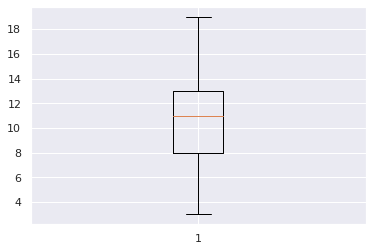

In [31]:
# 박스플롯: G1
plt.boxplot(student_data_math['G1'])
plt.grid(True)

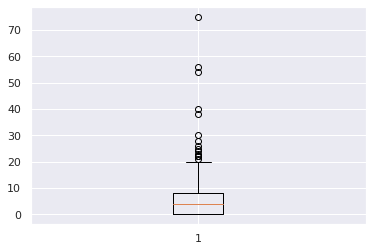

In [32]:
# 박스플롯: 결석일 수
plt.boxplot(student_data_math['absences'])
plt.grid(True)

-> 데이터에 이상값이 있을 경우 일반적인 박스플롯의 범위에 포함되지 않는다.

다음과 같이 여러 개의 박스플롯을 동시에 표시할 수도 있다.

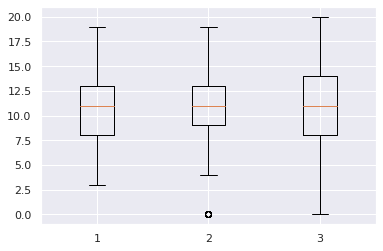

In [34]:
# 박스플롯: G1, G2, G3
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

## 변동계수(coefficient of variation, CV)

측정 단위가 서로 다른 자료를 가지고 이것들을 단순 비교할 수 없다. 데이터의 크기가 다르면 측정 단위가 큰 쪽이 편차도 커지는 경향이 있기 때문이다. 예를 들어 주가와 금값의 표준편차를 직접 비교하는 것은 무의미하다. 2천 전후로 변화하는 코스피 지수와 5만원대에서 변동하는 금값의 표준편차는 크기가 다르기 때문이다. 그래서 등장한 것이 변동계수다. 이 값을 사용하면 크기에 상관없이 비교할 수 있다. 일반적으로 CV로 표기한다.

**변동계수**: 표준편차를 평균값으로 나눈 값.


In [35]:
# 변동계수: 결석일 수
student_data_math['absences'].std() / student_data_math['absences'].mean()

1.402

describe() 실행 결과에는 변동계수가 없기 때문에 다음과 같이 코드를 작성하면 한번에 같이 계산된다.

판다스 또는 넘파이 DataFrame에서는 각 기준별로 한번에 계산된다.

In [36]:
student_data_math.std() / student_data_math.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

## 산점도와 상관계수

앞에서는 기본적으로 변수 하나만 가지고 그래프나 통계량을 계산했다. 이제 변수 간의 관계를 살펴보기 위해 산점도와 상관계수를 알아본다.

다음 산점도는 1학기 성적 G1과 최종학기 성적 G3과의 관계를 표시한다.

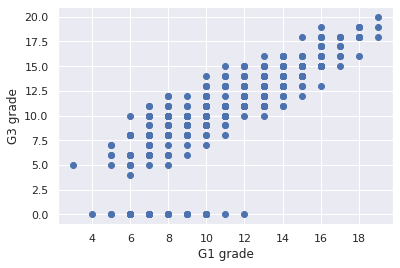

In [40]:
# 산점도
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

# 레이블
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

처음부터 성적이 좋은 사람일수록 최종성적이 좋은 것은 당연하지만 그러한 경향성을 그래프로 확인할 수 있다.

**공분산**